# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras    # intalled keras
import keras             # import keras

In [0]:
import numpy as np                                                        # import numpy for numerical calculation

from keras.models import Sequential                                       # import keras` Sequential model which is a linear stack of layers.
from keras.layers import Dense, Dropout, Activation, Flatten, Add         # importing : Dense - for fullconnected layers , Dropout : for dropout , Activation: activation function, 
                                                                          # Flatten : for converting n-dimensional array to 1-D array , Add : for adding layers

from keras.layers import Convolution2D, MaxPooling2D,BatchNormalization
from keras.utils import np_utils                                           # from keras.utils import np_utils which is a separate package (and a keras dependency - which doesn't get install with it)



from keras.datasets import mnist                                          # from keras.datasets, importing mnist dataset

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()                 # Load mnist and make  tuple pair of train and test

(60000, 28, 28)


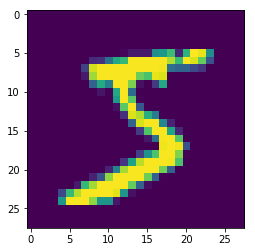

In [122]:
print (X_train.shape)                                                  # printing dimension of X_train. Total 60k of 2-Dimension 28x28 image
from matplotlib import pyplot as plt                                   # import pyplot as plt from matplotlib, used for plotting
%matplotlib inline                                                     # matplotlib magic command to show static plot right below our code
plt.imshow(X_train[0])                                                 # display first image in our training data

## Reshaping image because The Convolution2D layers in Keras are designed to work with 3 dimensions per example

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)      # reshaping 28x28x1 dimensions for all 60k images
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)         # reshaping 28x28x1 dimensions for all 10k images

## Change numpy array data types and Scaled
Currently it has "uint8" i.e. Unsigned integer (0 to 255).

**Scaled** ? Since we used Gradient Descent, for faster convergence we required number to be scaled.

In [0]:
X_train = X_train.astype('float32')                   # changed array’s data-type to float32
X_test = X_test.astype('float32')                     # same as above

# scale the pixel intensities down to the 0-1 range by dividing them by 255 which is the max value       
X_train /= 255
X_test /= 255

## One-hot vector labels of target variable

In [125]:
y_train[:10]                     # checking first 10 digits label (target variable)

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [127]:
Y_train[:10]                     # the first 10 class` array, compare the position of 1 (count starts from 0) in below and our y_train[:10] values. These two are same!!


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Import google colab drive and user authentication

In [128]:
from google.colab import drive
drive.mount('/content/gdrive')

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials 


# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Defining model

Used the following:

- Batchnormalization
- Dropout
- MaxPooling
- 1x1 convolution
- 3x3 kernel

Also please note, we have structure model as
- convolution block
- transition block


In [134]:
from keras.layers import Activation                             # importing "Activation" MaxPooling2D 
model = Sequential()                                            # initiate keras` Sequential model 

model.add(Convolution2D(32, 3, 3, activation='relu', use_bias=False,input_shape=(28,28,1)))    

model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Convolution2D(16, 3,3, use_bias=False, activation='relu'))                           
model.add(BatchNormalization())
model.add(Dropout(0.2))                       
model.add(Convolution2D(16, 3,3, use_bias=False, activation='relu'))                          


model.add(MaxPooling2D((2, 2)))                                                                
model.add(BatchNormalization())
model.add(Convolution2D(10, 1, use_bias=False, activation='relu'))   

model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Convolution2D(16, 3,3, use_bias=False, activation='relu'))                          
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Convolution2D(16, 3,3, use_bias=False, activation='relu'))                         

model.add(MaxPooling2D((2, 2)))                                                               
model.add(BatchNormalization())
model.add(Convolution2D(10, 1, use_bias=False, activation='relu')) 

model.add(Convolution2D(10, 3,3, use_bias=False, activation='relu'))  

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", use_bias=False, input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), use_bias=False, activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), use_bias=False, activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), use_bias=False, activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), use_bias=F

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_158 (Conv2D)          (None, 26, 26, 32)        288       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
batch_normalization_78 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_159 (Conv2D)          (None, 24, 24, 16)        4608      
_________________________________________________________________
batch_normalization_79 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_160 (Conv2D)          (None, 22, 22, 16)        2304      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), use_bias=False, activation="relu")`


## Configures the model for training.
- loss as 'categorical_crossentropy' since we are dealing with multi-class classification
- "adam" - Adaptive Moment Estimation one of the common/best gradient-based optimizer
- "accuracy" as the model metrics

In [0]:
# configure model with above parameters

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Callbacks for model monitor during training and saving weights

In [0]:
from keras.callbacks import  ModelCheckpoint  # importing checkpoint

filepath="/content/gdrive/My Drive/EVA_1.6_weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"                                  # filepath in google drive to save weights
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max',save_weights_only=True)    # checkpoint to monitor validation accuracy, and save which give max accuracy

### Fit the model on Training set
batch_size=25 : sends 25 image in batch-wise and train model (feed-forward and backpropagation)
10 number of epoch : One epoch is when an entire dataset is passed both forward and backward through the neural network only once.
verbose as 1 : show progress bar of the training with details

In [137]:
model.fit(X_train, Y_train, batch_size=25, nb_epoch=10, verbose=1,       # fit model with above notes along with checkpoint
         validation_data=(X_test, Y_test),callbacks=[checkpoint])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 53s 878us/step - loss: 0.3096 - acc: 0.9029 - val_loss: 0.0629 - val_acc: 0.9804

Epoch 00001: val_acc improved from -inf to 0.98040, saving model to /content/gdrive/My Drive/EVA_1.6_weights-improvement-01-0.98.hdf5
Epoch 2/10
60000/60000 [==============================] - 56s 927us/step - loss: 0.0906 - acc: 0.9718 - val_loss: 0.0436 - val_acc: 0.9865

Epoch 00002: val_acc improved from 0.98040 to 0.98650, saving model to /content/gdrive/My Drive/EVA_1.6_weights-improvement-02-0.99.hdf5
Epoch 3/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0715 - acc: 0.9779 - val_loss: 0.0407 - val_acc: 0.9867

Epoch 00003: val_acc improved from 0.98650 to 0.98670, saving model to /content/gdrive/My Drive/EVA_1.6_weights-improvement-03-0.99.hdf5
Epoch 4/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0628 - acc: 0.9811 - val_loss: 0.0334 - val

In [138]:
model.load_weights('/content/gdrive/My Drive/EVA_1.6_weights-improvement-10-0.99.hdf5')  # load weight which give 99.22 accuracy in above training

model.fit(X_train, Y_train, batch_size=25, nb_epoch=20, verbose=1,                       # fit the model and train for 20 epoch again
         validation_data=(X_test, Y_test),callbacks=[checkpoint])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
   75/60000 [..............................] - ETA: 1:55 - loss: 0.1059 - acc: 0.9733

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


60000/60000 [==============================] - 123s 2ms/step - loss: 0.0434 - acc: 0.9860 - val_loss: 0.0332 - val_acc: 0.9905

Epoch 00001: val_acc did not improve from 0.99220
Epoch 2/20
60000/60000 [==============================] - 121s 2ms/step - loss: 0.0407 - acc: 0.9872 - val_loss: 0.0261 - val_acc: 0.9927

Epoch 00002: val_acc improved from 0.99220 to 0.99270, saving model to /content/gdrive/My Drive/EVA_1.6_weights-improvement-02-0.99.hdf5
Epoch 3/20
60000/60000 [==============================] - 122s 2ms/step - loss: 0.0406 - acc: 0.9878 - val_loss: 0.0274 - val_acc: 0.9927

Epoch 00003: val_acc improved from 0.99270 to 0.99270, saving model to /content/gdrive/My Drive/EVA_1.6_weights-improvement-03-0.99.hdf5
Epoch 4/20
60000/60000 [==============================] - 122s 2ms/step - loss: 0.0397 - acc: 0.9868 - val_loss: 0.0262 - val_acc: 0.9923

Epoch 00004: val_acc did not improve from 0.99270
Epoch 5/20
60000/60000 [==============================] - 123s 2ms/step - loss: 0

In [139]:
model.load_weights('/content/gdrive/My Drive/EVA_1.6_weights-improvement-09-0.99.hdf5')    # load weight which give 99.3 accuracy in above training


model.fit(X_train, Y_train, batch_size=25, nb_epoch=40, verbose=1,                         # fit the model and train for 40 epoch again
         validation_data=(X_test, Y_test),callbacks=[checkpoint])

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
   75/60000 [..............................] - ETA: 2:22 - loss: 0.0029 - acc: 1.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


60000/60000 [==============================] - 126s 2ms/step - loss: 0.0360 - acc: 0.9886 - val_loss: 0.0242 - val_acc: 0.9928

Epoch 00001: val_acc did not improve from 0.99300
Epoch 2/40
60000/60000 [==============================] - 125s 2ms/step - loss: 0.0332 - acc: 0.9894 - val_loss: 0.0236 - val_acc: 0.9930

Epoch 00002: val_acc did not improve from 0.99300
Epoch 3/40
60000/60000 [==============================] - 125s 2ms/step - loss: 0.0330 - acc: 0.9891 - val_loss: 0.0251 - val_acc: 0.9920

Epoch 00003: val_acc did not improve from 0.99300
Epoch 4/40
60000/60000 [==============================] - 125s 2ms/step - loss: 0.0342 - acc: 0.9893 - val_loss: 0.0267 - val_acc: 0.9920

Epoch 00004: val_acc did not improve from 0.99300
Epoch 5/40
60000/60000 [==============================] - 124s 2ms/step - loss: 0.0308 - acc: 0.9899 - val_loss: 0.0261 - val_acc: 0.9917

Epoch 00005: val_acc did not improve from 0.99300
Epoch 6/40
60000/60000 [==============================] - 125s 2ms

In [150]:
model.load_weights('/content/gdrive/My Drive/EVA_1.6_weights-improvement-38-0.99.hdf5')    # load weight which give 99.4 accuracy in above training


model.fit(X_train, Y_train, batch_size=25, nb_epoch=10, verbose=1,                         # fit the model and train for 10 epoch again
         validation_data=(X_test, Y_test),callbacks=[checkpoint])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
  250/60000 [..............................] - ETA: 45s - loss: 0.0322 - acc: 0.9840

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


60000/60000 [==============================] - 49s 809us/step - loss: 0.0242 - acc: 0.9921 - val_loss: 0.0233 - val_acc: 0.9926

Epoch 00001: val_acc did not improve from 0.99400
Epoch 2/10
60000/60000 [==============================] - 49s 813us/step - loss: 0.0241 - acc: 0.9922 - val_loss: 0.0245 - val_acc: 0.9929

Epoch 00002: val_acc did not improve from 0.99400
Epoch 3/10
60000/60000 [==============================] - 49s 814us/step - loss: 0.0228 - acc: 0.9923 - val_loss: 0.0226 - val_acc: 0.9941

Epoch 00003: val_acc improved from 0.99400 to 0.99410, saving model to /content/gdrive/My Drive/EVA_1.6_weights-improvement-03-0.99.hdf5
Epoch 4/10
60000/60000 [==============================] - 48s 805us/step - loss: 0.0233 - acc: 0.9927 - val_loss: 0.0253 - val_acc: 0.9926

Epoch 00004: val_acc did not improve from 0.99410
Epoch 5/10
60000/60000 [==============================] - 48s 802us/step - loss: 0.0240 - acc: 0.9922 - val_loss: 0.0228 - val_acc: 0.9939

Epoch 00005: val_acc did

## Model evaluation
Please note that predict is a part of model evaluation. Only after we predict, one can used prediction value to evalute our metrics, say "accuracy"

In [0]:
model.load_weights('/content/gdrive/My Drive/EVA_1.6_weights-improvement-03-0.99.hdf5')    # load weight which give 99.41 validation accuracy in above training

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)    # Use trained model and predict on test set , then finally score metrics. We have given "accuracy" as our metrics

In [153]:
print(score)  # print validation score

[0.02262122784848325, 0.9941]


In [0]:
y_pred = model.predict(X_test)   # used trained model to predict class

In [155]:
print(y_pred[:9])   # first 9 prediction
print(y_test[:9])    # actual 9 targel class

[[1.8394343e-09 1.8394343e-09 6.1321783e-09 1.6163167e-08 1.8394343e-09
  1.8394343e-09 1.8394343e-09 9.9999988e-01 1.8394343e-09 1.5962836e-07]
 [4.3903731e-07 7.7913010e-06 9.9999142e-01 2.8926873e-08 2.3842969e-07
  2.8926873e-08 2.8926873e-08 2.8926873e-08 2.8926873e-08 2.8926873e-08]
 [1.6051163e-06 9.9996603e-01 1.6051163e-06 1.6051163e-06 9.8222754e-06
  2.1602802e-06 4.2789588e-06 9.6953709e-06 1.6051163e-06 1.6051163e-06]
 [9.9998915e-01 3.8215592e-08 3.8215592e-08 3.8215592e-08 6.5953209e-08
  6.5411008e-08 2.0478833e-06 3.8215592e-08 2.2245818e-07 8.2861252e-06]
 [7.3233825e-10 7.3233825e-10 7.3233825e-10 7.3233825e-10 9.9999809e-01
  7.3233825e-10 7.3233825e-10 7.3233825e-10 5.5439786e-09 1.8434835e-06]
 [1.0637756e-06 9.9996364e-01 1.7070030e-06 1.0637756e-06 5.3266244e-06
  1.0637756e-06 1.5220249e-06 2.2494276e-05 1.0637756e-06 1.0637756e-06]
 [1.1131694e-09 1.2117336e-09 1.1131694e-09 1.1131694e-09 1.0000000e+00
  1.1131694e-09 1.1131694e-09 4.7465250e-08 5.9833560e-09 

## Visualization

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

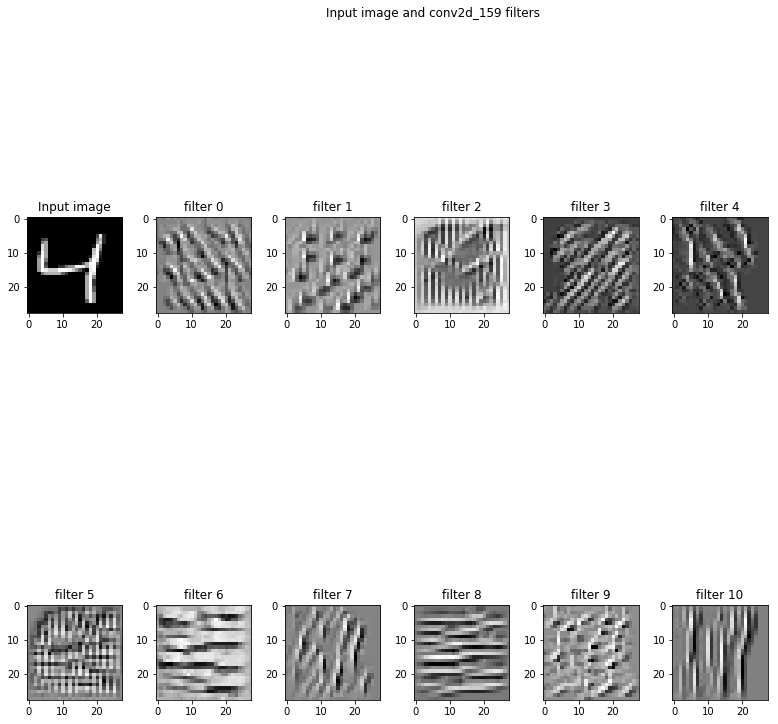

In [157]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_159'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()